In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 설치된 나눔폰트 경로 지정
plt.rcParams['font.family'] = 'NanumGothic'  # 또는 'NanumBarunGothic' 등

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

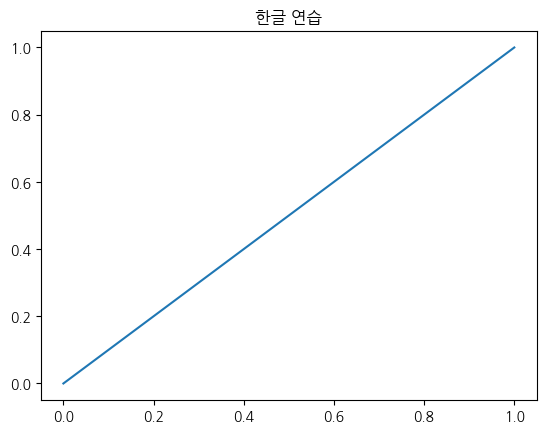

In [2]:
plt.plot([0,1], [0,1])
plt.title('한글 연습')
plt.show()

In [3]:
import numpy as np
import pandas as pd

crime_raw_data = pd.read_csv('2018년.csv', encoding='euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,5
3,중부,강도,검거,7
4,중부,강간,발생,132


In [4]:
#데이터의 info와 '죄종'의 UNIQUE 조사
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


In [5]:
crime_raw_data['죄종'].unique()

array(['살인', '강도', '강간', '절도', '폭력'], dtype=object)

코딩의 목적: 강남 3구가 안전한가?

In [6]:
#index가 경찰서가 되도록 함
#pivot_table 통해 데이터 정리
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index= ['구분'], columns = ['죄종', '발생검거'], aggfunc = np.sum
)

crime_station.head()

건수                                            
죄종     강간       강도     살인        절도          폭력      
발생검거   검거   발생  검거  발생 검거  발생    검거    발생    검거    발생
구분                                                   
강남    352  406   8   9  8   5   836  2020  1890  2188
강동    143  170   7   7  3   3   765  1515  1871  2224
강북    135  188   7   7  6   8   603  1112  1992  2122
강서    246  269   3   6  9  11   982  1724  2229  2619
관악    305  352  12  10  9   9  1025  2012  2302  2643

In [7]:
crime_station.columns

MultiIndex([('건수', '강간', '검거'),
            ('건수', '강간', '발생'),
            ('건수', '강도', '검거'),
            ('건수', '강도', '발생'),
            ('건수', '살인', '검거'),
            ('건수', '살인', '발생'),
            ('건수', '절도', '검거'),
            ('건수', '절도', '발생'),
            ('건수', '폭력', '검거'),
            ('건수', '폭력', '발생')],
           names=[None, '죄종', '발생검거'])

In [8]:
crime_station.columns = crime_station.columns.droplevel([0])
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [9]:
crime_station['강도', '검거']

구분
강남      8
강동      7
강북      7
강서      3
관악     12
광진      1
구로      9
금천      6
남대문     4
노원      5
도봉      3
동대문     4
동작      7
마포      7
방배      1
서대문     3
서부      0
서초      4
성동      8
성북      0
송파      8
수서      2
양천     14
영등포     6
용산      2
은평      1
종로      0
종암      2
중랑      3
중부      7
혜화      2
Name: (강도, 검거), dtype: int64

In [10]:
crime_station['살인', '발생']

구분
강남      5
강동      3
강북      8
강서     11
관악      9
광진      7
구로      8
금천      6
남대문     1
노원      5
도봉      1
동대문     2
동작      3
마포      6
방배      0
서대문     5
서부      4
서초      5
성동      2
성북      1
송파      5
수서      5
양천      2
영등포    17
용산      1
은평      4
종로      5
종암      6
중랑      4
중부      1
혜화      1
Name: (살인, 발생), dtype: int64

In [11]:
#특정한 값에 접근할 때는 loc 옵션 통해서
crime_station.loc['강남', ('강도', '발생')]

9

In [12]:
crime_station.head()

죄종     강간       강도     살인        절도          폭력      
발생검거   검거   발생  검거  발생 검거  발생    검거    발생    검거    발생
구분                                                   
강남    352  406   8   9  8   5   836  2020  1890  2188
강동    143  170   7   7  3   3   765  1515  1871  2224
강북    135  188   7   7  6   8   603  1112  1992  2122
강서    246  269   3   6  9  11   982  1724  2229  2619
관악    305  352  12  10  9   9  1025  2012  2302  2643

In [13]:
#(0)은 강간,강도,살인,절도 (1)는 발생 or 검거  이 둘 합친다고 생각
tmp = crime_station.columns.get_level_values(0) + \
    crime_station.columns.get_level_values(1)
    
tmp

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [14]:
crime_station.columns

MultiIndex([('강간', '검거'),
            ('강간', '발생'),
            ('강도', '검거'),
            ('강도', '발생'),
            ('살인', '검거'),
            ('살인', '발생'),
            ('절도', '검거'),
            ('절도', '발생'),
            ('폭력', '검거'),
            ('폭력', '발생')],
           names=['죄종', '발생검거'])

In [15]:
crime_station.columns = tmp
crime_station.columns

Index(['강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생', '폭력검거',
       '폭력발생'],
      dtype='object')

In [16]:
crime_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   강간검거    31 non-null     int64
 1   강간발생    31 non-null     int64
 2   강도검거    31 non-null     int64
 3   강도발생    31 non-null     int64
 4   살인검거    31 non-null     int64
 5   살인발생    31 non-null     int64
 6   절도검거    31 non-null     int64
 7   절도발생    31 non-null     int64
 8   폭력검거    31 non-null     int64
 9   폭력발생    31 non-null     int64
dtypes: int64(10)
memory usage: 3.7+ KB


In [17]:
#dictionary 이용한 데이터 정리
dict_sample = {'Name': 'Zara', 'Age':7, 'Class': 'First'}
dict_sample.keys()

dict_keys(['Name', 'Age', 'Class'])

In [18]:
dict_sample.values()

dict_values(['Zara', 7, 'First'])

In [19]:
dict_sample['Name']

'Zara'

In [20]:
#서울시 구 이름으로 변경 위한 dictionary형 변수 선언
real_gu = {'종로구' : ['종로', '혜화'], '중구' : ['남대문', '중부'],
           '용산구' : ['용산'], '성동구' : ['성동'],
           '광진구' : ['광진'], '동대문구' : ['동대문'],
           '중랑구' : ['중랑'], '성북구' : ['성북', '종암'],
           '강북구' : ['강북'], '도봉구' : ['도봉'],
           '노원구' : ['노원'], '은평구' : ['서부', '은평'],
           '서대문구' : ['서대문'], '마포구' : ['마포'],
           '양천구' : ['양천'], '강서구' : ['강서'],
           '구로구' : ['구로'], '금천구' : ['금천'],
           '영등포구' : ['영등포'], '동작구' : ['동작'],
           '관악구' : ['관악'], '서초구' : ['방배', '서초'],
           '강남구' : ['강남', '수서'], '송파구' : ['송파'],
           '강동구' : ['강동']}

In [21]:
for gu_name, station_name in real_gu.items():
    if '강남' in station_name:
        print(gu_name)

강남구


In [22]:
for a, b in real_gu.items():
    if '강남' in b:
        print(a)

강남구


In [23]:
tmp_gu = []

for station in crime_station.index:
    for gu_name, station_name in real_gu.items():
        if station in station_name:
            tmp_gu.append(gu_name)

tmp_gu

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '중구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서초구',
 '서대문구',
 '은평구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '강남구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '성북구',
 '중랑구',
 '중구',
 '종로구']

In [24]:
#구 이름으로 된 데이터 프레임 완성
crime_station['구'] = tmp_gu
crime_station

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구
구분,,,,,,,,,,,
강남,352,406,8,9,8,5,836,2020,1890,2188,강남구
강동,143,170,7,7,3,3,765,1515,1871,2224,강동구
강북,135,188,7,7,6,8,603,1112,1992,2122,강북구
강서,246,269,3,6,9,11,982,1724,2229,2619,강서구
관악,305,352,12,10,9,9,1025,2012,2302,2643,관악구
광진,184,229,1,2,5,7,974,1769,1625,1908,광진구
구로,181,250,9,9,8,8,787,1717,2353,2826,구로구
금천,185,200,6,7,6,6,645,1168,1725,1912,금천구
남대문,52,75,4,6,1,1,417,798,709,779,중구


In [25]:
#어떤 구는 경찰서가 두 개 있는 경우
#구를 기준으로 합쳐
crime_gu = pd.pivot_table(crime_station, index='구', aggfunc=np.sum)
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885
강동구,143,170,7,7,3,3,765,1515,1871,2224
강북구,135,188,7,7,6,8,603,1112,1992,2122
강서구,246,269,3,6,9,11,982,1724,2229,2619
관악구,305,352,12,10,9,9,1025,2012,2302,2643


In [26]:
crime_gu['살인발생'].sort_values(ascending=False).head()

구
영등포구    17
강서구     11
강남구     10
관악구      9
강북구      8
Name: 살인발생, dtype: int64

In [27]:
crime_gu['폭력발생'].sort_values(ascending=False).head()

구
강남구     3885
송파구     3135
영등포구    3132
구로구     2826
마포구     2676
Name: 폭력발생, dtype: int64

In [28]:
#검거율 체크
crime_gu['강도검거']/crime_gu['강도발생']

구
강남구     0.714286
강동구     1.000000
강북구     1.000000
강서구     0.500000
관악구     1.200000
광진구     0.500000
구로구     1.000000
금천구     0.857143
노원구     1.000000
도봉구     0.600000
동대문구    0.800000
동작구     1.000000
마포구     1.166667
서대문구    1.000000
서초구     1.000000
성동구     1.600000
성북구     2.000000
송파구     1.333333
양천구     3.500000
영등포구    0.750000
용산구     0.666667
은평구     1.000000
종로구     0.666667
중구      1.000000
중랑구     1.000000
dtype: float64

In [29]:
num = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
den = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']

crime_gu[num].div(crime_gu[den].values)

,강간검거,강도검거,살인검거,절도검거,폭력검거
구,,,,,
강남구,0.871667,0.714286,1.300000,0.438415,0.857915
강동구,0.841176,1.000000,1.000000,0.504950,0.841277
강북구,0.718085,1.000000,0.750000,0.542266,0.938737
강서구,0.914498,0.500000,0.818182,0.569606,0.851088
관악구,0.866477,1.200000,1.000000,0.509443,0.870980
광진구,0.803493,0.500000,0.714286,0.550594,0.851677
구로구,0.724000,1.000000,1.000000,0.458358,0.832626
금천구,0.925000,0.857143,1.000000,0.552226,0.902197
노원구,0.891753,1.000000,0.800000,0.411392,0.822344


In [30]:
target = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']

crime_gu[target] = crime_gu[num].div(crime_gu[den].values)*100
crime_gu.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,,,,,,
강남구,523,600,10,14,13,10,1317,3004,3333,3885,87.166667,71.428571,130.000000,43.841545,85.791506
강동구,143,170,7,7,3,3,765,1515,1871,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,135,188,7,7,6,8,603,1112,1992,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,246,269,3,6,9,11,982,1724,2229,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,305,352,12,10,9,9,1025,2012,2302,2643,86.647727,120.000000,100.000000,50.944334,87.097995


In [31]:
crime_gu = crime_gu.drop(columns=num)
crime_gu.head()

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,130.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,120.000000,100.000000,50.944334,87.097995


In [32]:
#검거율 100퍼 넘는곳 확인
crime_gu[target] > 100

,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,
강남구,False,False,True,False,False
강동구,False,False,False,False,False
강북구,False,False,False,False,False
강서구,False,False,False,False,False
관악구,False,True,False,False,False
광진구,False,False,False,False,False
구로구,False,False,False,False,False
금천구,False,False,False,False,False
노원구,False,False,False,False,False


In [33]:
crime_gu[crime_gu[target]>100] = 100
crime_gu

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995
광진구,229,2,7,1769,1908,80.349345,50.000000,71.428571,55.059356,85.167715
구로구,250,9,8,1717,2826,72.400000,100.000000,100.000000,45.835760,83.262562
금천구,200,7,6,1168,1912,92.500000,85.714286,100.000000,55.222603,90.219665
노원구,194,5,5,1422,2381,89.175258,100.000000,80.000000,41.139241,82.234355


In [34]:
#칼럼 이름 줄이기
crime_gu.rename(columns = {'강간발생' : '강간',
                           '강도발생' : '강도',
                           '살인발생' : '살인',
                           '절도발생' : '절도',
                           '폭력발생' : '폭력'}, inplace=True)

crime_gu.head()


,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995


In [35]:
#발생 건수 간 수치 차이가 심함
#스케일 조정
col = ['강간', '강도', '살인', '절도', '폭력']
crime_gu_norm = crime_gu[col] / crime_gu[col].max()
crime_gu_norm.head()


,강간,강도,살인,절도,폭력
구,,,,,
강남구,1.000000,1.000000,0.588235,1.000000,1.000000
강동구,0.283333,0.500000,0.176471,0.504328,0.572458
강북구,0.313333,0.500000,0.470588,0.370173,0.546203
강서구,0.448333,0.428571,0.647059,0.573901,0.674131
관악구,0.586667,0.714286,0.529412,0.669774,0.680309


In [36]:
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_gu_norm[col2] = crime_gu[col2]
crime_gu_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,1.000000,1.000000,0.588235,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,0.283333,0.500000,0.176471,0.504328,0.572458,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,0.313333,0.500000,0.470588,0.370173,0.546203,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,0.448333,0.428571,0.647059,0.573901,0.674131,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,0.586667,0.714286,0.529412,0.669774,0.680309,86.647727,100.000000,100.000000,50.944334,87.097995


In [37]:
crime_gu_norm['범죄'] = np.mean(crime_gu_norm[col], axis=1)
crime_gu_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄
구,,,,,,,,,,,
강남구,1.000000,1.000000,0.588235,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506,0.917647
강동구,0.283333,0.500000,0.176471,0.504328,0.572458,84.117647,100.000000,100.000000,50.495050,84.127698,0.407318
강북구,0.313333,0.500000,0.470588,0.370173,0.546203,71.808511,100.000000,75.000000,54.226619,93.873704,0.440060
강서구,0.448333,0.428571,0.647059,0.573901,0.674131,91.449814,50.000000,81.818182,56.960557,85.108820,0.554399
관악구,0.586667,0.714286,0.529412,0.669774,0.680309,86.647727,100.000000,100.000000,50.944334,87.097995,0.636089


In [38]:
crime_gu_norm['범죄'].sort_values(ascending=False).head()

구
강남구     0.917647
영등포구    0.758451
관악구     0.636089
마포구     0.585618
구로구     0.565819
Name: 범죄, dtype: float64

In [39]:
#검거의 정렬 기준을 잡기 위해 검거 평균치 생성
crime_gu_norm['검거'] = np.mean(crime_gu_norm[col2], axis=1)
crime_gu_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,범죄,검거
구,,,,,,,,,,,,
강남구,1.000000,1.000000,0.588235,1.000000,1.000000,87.166667,71.428571,100.000000,43.841545,85.791506,0.917647,77.645658
강동구,0.283333,0.500000,0.176471,0.504328,0.572458,84.117647,100.000000,100.000000,50.495050,84.127698,0.407318,83.748079
강북구,0.313333,0.500000,0.470588,0.370173,0.546203,71.808511,100.000000,75.000000,54.226619,93.873704,0.440060,78.981767
강서구,0.448333,0.428571,0.647059,0.573901,0.674131,91.449814,50.000000,81.818182,56.960557,85.108820,0.554399,73.067475
관악구,0.586667,0.714286,0.529412,0.669774,0.680309,86.647727,100.000000,100.000000,50.944334,87.097995,0.636089,84.938011


In [40]:
crime_gu_norm['검거'].sort_values(ascending=False).head()

구
은평구    88.422435
중랑구    85.141076
관악구    84.938011
금천구    84.731311
양천구    84.643240
Name: 검거, dtype: float64

In [41]:
#검거율 낮은 구?
crime_gu_norm['검거'].sort_values().head()

구
광진구     68.400997
종로구     71.909294
영등포구    72.000054
강서구     73.067475
동작구     76.825315
Name: 검거, dtype: float64

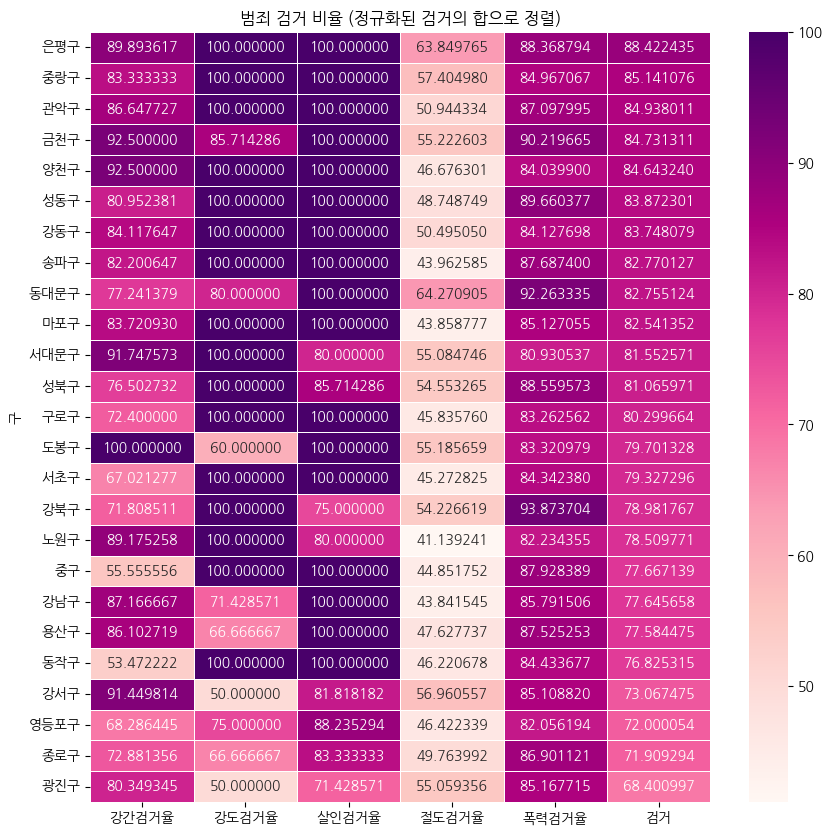

In [42]:
import seaborn as sns
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율', '검거' ]

crime_gu_norm_sort = crime_gu_norm.sort_values(by='검거', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col],
            annot=True, fmt='f', linewidth=0.5, cmap='RdPu')
plt.title('범죄 검거 비율 (정규화된 검거의 합으로 정렬)')
plt.show()

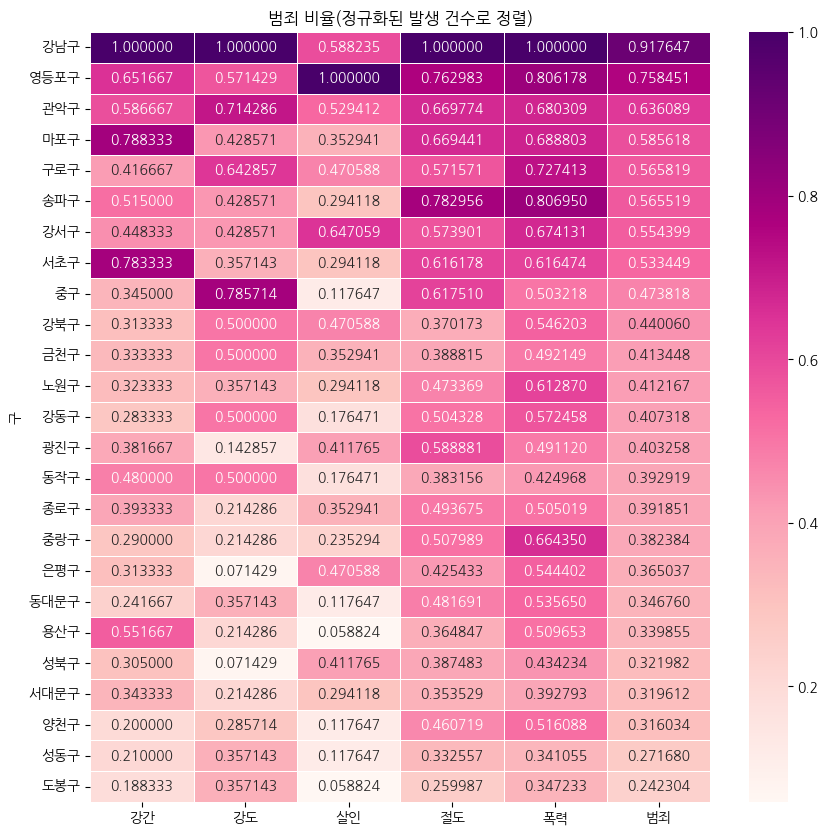

In [43]:
#범죄로 정렬하는 코드
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']
crime_gu_norm_sort = crime_gu_norm.sort_values(by='범죄', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_gu_norm_sort[target_col],
            annot=True, fmt='f', linewidth=0.5, cmap='RdPu')
plt.title('범죄 비율(정규화된 발생 건수로 정렬)')
plt.show()

In [44]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import folium

m = folium.Map(location=[45.5236, -122.6750])
m

In [46]:
folium.Map(location = [22.20111, 113.54417], tiles='OpenStreetMap', zoom_start=13)

In [47]:
folium.Map(location = [22.20111, 113.54417], tiles='Cartodb dark_matter', zoom_start=13)

In [51]:
#지도에 마커를 붙이고  팝업 메뉴 장착
my_map = folium.Map(location = [45.372, -121.6972], zoom_start=12)

folium.Marker([45.3288, -121.6625], popup='<i>Mt. Hood Meadows</i>').add_to(my_map)
folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>').add_to(my_map)

my_map


In [53]:
import json
geo_str = json.load(open('./skorea_municipalities_geo_simple.json', encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [54]:
crime_gu.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구,,,,,,,,,,
강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995


In [55]:
#'구'를 인덱스에서 일반 칼럼으로 변경
crime_gu.reset_index().rename(columns={"index":"구"})
crime_gu.rename_axis('구').reset_index()
crime_gu.index_name = '구'
crime_gu = crime_gu.reset_index()
crime_gu.head()

,구,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
0,강남구,600,14,10,3004,3885,87.166667,71.428571,100.000000,43.841545,85.791506
1,강동구,170,7,3,1515,2224,84.117647,100.000000,100.000000,50.495050,84.127698
2,강북구,188,7,8,1112,2122,71.808511,100.000000,75.000000,54.226619,93.873704
3,강서구,269,6,11,1724,2619,91.449814,50.000000,81.818182,56.960557,85.108820
4,관악구,352,10,9,2012,2643,86.647727,100.000000,100.000000,50.944334,87.097995


In [56]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(
    geo_data = geo_str,
    data = crime_gu, columns = ['구', '살인'],
    key_on = 'feature.id', fill_color='PuRd',
    legend_name = 'Number of murder cases'
).add_to(my_map)

my_map

In [58]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
folium.Choropleth(
    geo_data = geo_str,
    data = crime_gu, columns = ['구', '폭력'],
    key_on = 'feature.id', fill_color='PuRd',
    legend_name = 'Number of violence cases'
).add_to(my_map)

my_map